# FITS in Astropy 

This lecture demonstrates the use of astropy.utils.data to download a data file, then uses astropy.io.fits to open the file, and lastly uses matplotlib to view the image with different color scales and stretches and to make histograms. In this tutorial we’ve also included a demonstration of simple image stacking.



In [3]:
import numpy as np

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits

In [4]:
from astropy.utils.data import download_file
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )

In [5]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: /home/pranav/.astropy/cache/download/py3/2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


Generally, the image information is located in the PRIMARY block. The blocks are numbered and can be accessed by indexing hdu_list.

In [7]:
image_data = hdu_list[0].data

Our data is now stored as a 2D numpy array. But how do we know the dimensions of the image? We can look at the shape of the array.



In [8]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


In [9]:
hdu_list.close()

In [10]:
###SHORTCUT


image_data = fits.getdata(image_file)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


## Viewing the image data and getting basic statistics

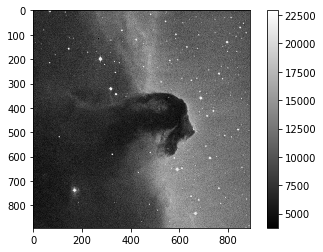

In [11]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()

# To see more color maps
# http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps

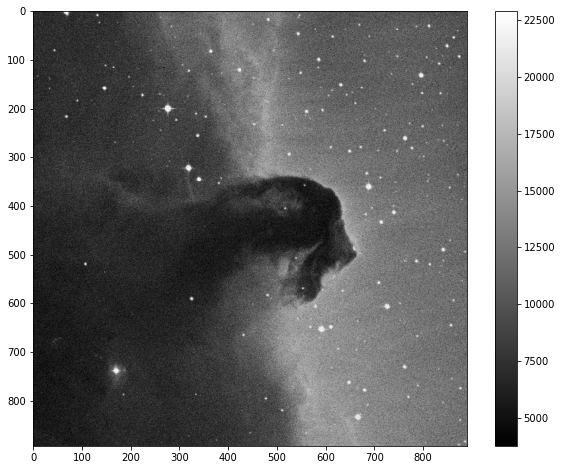

In [13]:
myfig = plt.figure(figsize=(10,8))
plt.imshow(image_data, cmap='gray')
plt.colorbar()


## This is the horsehead Nebula in Orion

Let's print ssome basic statistic of the image

In [14]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
Stdev: 3032.3927542049046


## Plotting a histogram
To make a histogram with matplotlib.pyplot.hist(), we’ll need to cast the data from a 2D array to something one dimensional.

In this case, let’s use the ndarray.flatten() to return a 1D numpy array.

In [15]:
print(type(image_data.flatten()))

<class 'numpy.ndarray'>


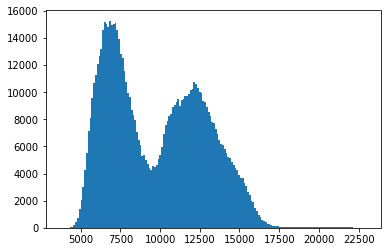

In [16]:
histogram = plt.hist(image_data.flatten(), bins='auto')

## Displaying the image with a logarithmic scale
What if we want to use a logarithmic color scale? To do so, we’ll need to load the LogNorm object from matplotlib.

In [17]:
from matplotlib.colors import LogNorm

[Text(1, 0, '5,000'), Text(1, 0, '10,000'), Text(1, 0, '20,000')]

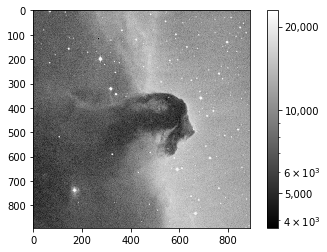

In [18]:
plt.imshow(image_data, cmap='gray', norm=LogNorm())

# I chose the tick marks based on the histogram above
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

## Basic image math: image stacking
You can also perform math with the image data like any other numpy array. In this particular example, we’ll stack several images of M13 taken with a ~10’’ telescope.

Let’s start by opening a series of FITS files and store the data in a list, which we’ve named image_concat.

In [19]:
base_url = 'http://data.astropy.org/tutorials/FITS-images/M13_blue_{0:04d}.fits'

image_list = [download_file(base_url.format(n), cache=True)
              for n in range(1, 5+1)]
image_concat = [fits.getdata(image) for image in image_list]

In [20]:
final_image = np.zeros(shape=image_concat[0].shape)

for image in image_concat:
    final_image += image

# The short way
# final_image = np.sum(image_concat, axis=0)

We’re going to show the image, but need to decide on the best stretch. To do so let’s plot a histogram of the data.

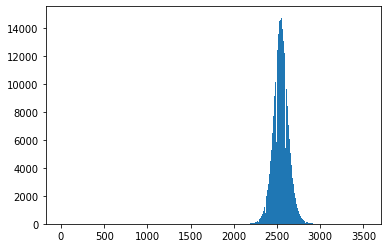

In [21]:
image_hist = plt.hist(final_image.flatten(), bins='auto')

We’ll use the keywords vmin and vmax to set limits on the color scaling for imshow.

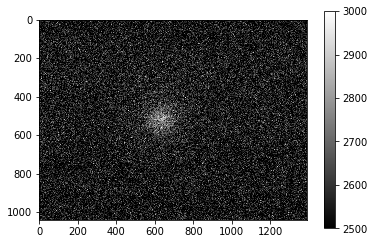

In [24]:
plt.imshow(final_image, cmap='gray', vmin=2.5E3, vmax=3E3)
plt.colorbar()
